<a href="https://colab.research.google.com/github/ChandanaKandari/Recommendation-System-Best-Activity-for-the-Week/blob/main/Multi_Label_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 2.4.1


In [ ]:
# Simulating Data:
day, temp, rain, wind, label = [],[],[],[],[]
day_count= 1
for x in range(365):
  if x <= 99:# The range starts from 0 
    # Hiking
    temp.append(random.randint(60, 80)) # Optimum Temperature 
    rain.append(random.randint(0, 5)) #Optimum Propability of rain
    wind.append(random.randint(0, 24)) #Optimum Wind Mph
    label.append("Hiking")
    day.append(day_count)
  elif x <= 200:
    # Running
    temp.append(random.randint(70, 80)) # Optimum Temperature 
    rain.append(random.randint(0, 50)) # Optimum Propability of rain
    wind.append(random.randint(0, 24)) # Optimum Wind Mph
    label.append("Running")
    day.append(day_count) 
  else:
    temp.append(random.randint(40, 120)) # Optimum Temperature 
    rain.append(random.randint(0, 100)) # Optimum Propability of rain
    wind.append(random.randint(0, 40)) # Optimum Wind Mph
    label.append("Home")
    day.append(day_count)
  day_count+=1

In [ ]:
combine_array = [day,temp,rain,wind,label]
df = pd.DataFrame(combine_array).T
df.columns = "Day","Temp","Rain","Wind","Label"
df

,Day,Temp,Rain,Wind,Label
0,1,70,1,18,Hiking
1,2,80,1,22,Hiking
2,3,68,5,21,Hiking
3,4,79,4,14,Hiking
4,5,64,5,20,Hiking
...,...,...,...,...,...
360,361,56,46,38,Home
361,362,86,57,37,Home
362,363,46,46,18,Home
363,364,68,30,6,Home


In [ ]:
df["Label_Encode"] = df["Label"].map({"Hiking":0,"Running":1,"Home":2})
df

,Day,Temp,Rain,Wind,Label,Label_Encode
0,1,70,1,18,Hiking,0
1,2,80,1,22,Hiking,0
2,3,68,5,21,Hiking,0
3,4,79,4,14,Hiking,0
4,5,64,5,20,Hiking,0
...,...,...,...,...,...,...
360,361,56,46,38,Home,2
361,362,86,57,37,Home,2
362,363,46,46,18,Home,2
363,364,68,30,6,Home,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Day           365 non-null    object
 1   Temp          365 non-null    object
 2   Rain          365 non-null    object
 3   Wind          365 non-null    object
 4   Label         365 non-null    object
 5   Label_Encode  365 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 17.2+ KB


In [ ]:
X_Data = df[["Temp","Rain","Wind"]].astype('float')
X_Data.describe()

,Temp,Rain,Wind
count,365.000000,365.000000,365.000000
mean,75.238356,28.816438,15.328767
std,16.801055,28.827009,9.973392
min,40.000000,0.000000,0.000000
25%,67.000000,4.000000,8.000000
50%,73.000000,20.000000,13.000000
75%,80.000000,46.000000,22.000000
max,120.000000,99.000000,40.000000


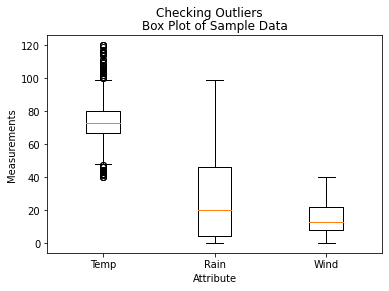

In [ ]:
# Identify impossible values and outliers using boxplot
plt.boxplot(X_Data.values,labels=["Temp","Rain","Wind"])
plt.title("Box Plot of Sample Data")
plt.suptitle("Checking Outliers")
plt.xlabel("Attribute") # x axis label
plt.ylabel("Measurements") # y axis label
plt.show()

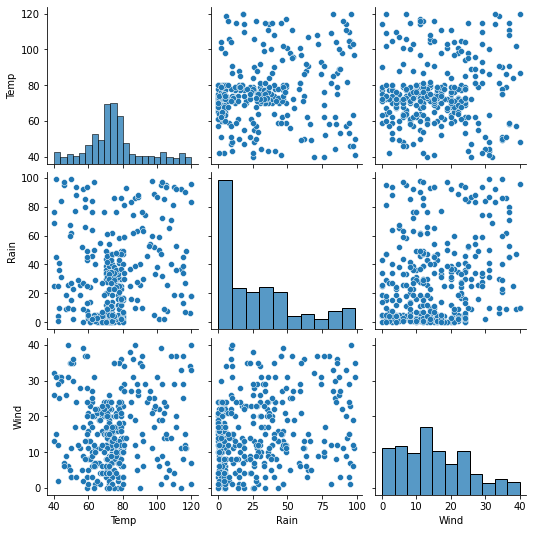

In [ ]:
import seaborn as sns
g=sns.pairplot(X_Data, height= 2.5)

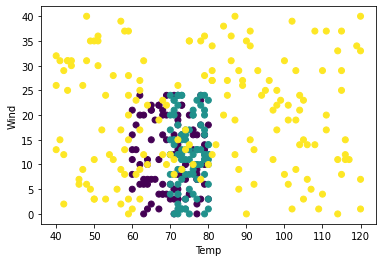

In [ ]:
plt.scatter(df['Temp'],
            df['Wind'],
            c=df["Label_Encode"].values)
plt.xlabel("Temp")
plt.ylabel("Wind")
plt.show()

<Figure size 432x288 with 0 Axes>

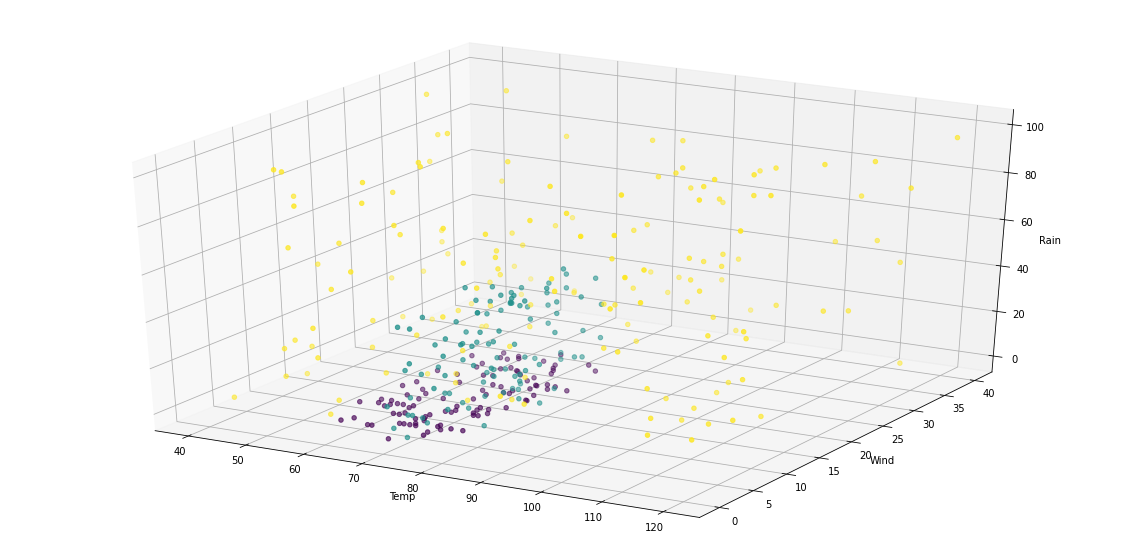

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
x =temp
y =wind
z =rain
ax.scatter(x, y, z, c=df["Label_Encode"], marker='o')
ax.set_xlabel('Temp')
ax.set_ylabel('Wind')
ax.set_zlabel('Rain')
plt.show()

In [ ]:
# Normalizing data = Helps in Conversion in SGD
X_Data = X_Data.apply(lambda x:( (x - x.min()) / (x.max()-x.min())))
X_Data

,Temp,Rain,Wind
0,0.3375,0.010101,0.275
1,0.4500,0.020202,0.400
2,0.3375,0.040404,0.100
3,0.5000,0.000000,0.450
4,0.3500,0.050505,0.400
...,...,...,...
360,0.1625,0.949495,0.600
361,0.8000,0.858586,0.600
362,0.7500,0.878788,0.775
363,0.0250,0.252525,0.725


In [ ]:
Y_Data = df["Label_Encode"]
Y_Data = pd.get_dummies(Y_Data)
Y_Data

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
360,0,0,1
361,0,0,1
362,0,0,1
363,0,0,1


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_Data, Y_Data, test_size=0.20, random_state=40)
print(train_x.shape); print(train_y.shape)

(292, 3)
(292, 3)


In [ ]:
pd.concat([train_x,train_y],axis=1)

,Temp,Rain,Wind,0,1,2
354,0.6125,0.888889,0.675,0,0,1
208,0.1875,0.262626,0.700,0,0,1
140,0.5000,0.171717,0.300,0,1,0
187,0.4250,0.191919,0.325,0,1,0
53,0.3875,0.020202,0.075,1,0,0
...,...,...,...,...,...,...
306,0.5875,0.393939,0.475,0,0,1
165,0.4500,0.353535,0.500,0,1,0
7,0.2500,0.040404,0.525,1,0,0
219,0.1000,0.101010,1.000,0,0,1


**# SoftMax a.k.a Normalization over different classes**
<img src="https://miro.medium.com/max/906/1*_IDMoFnoJT916hhUREiFAQ.png" alt="Girl in a jacket" style="vertical-align:top">

In [ ]:
# Model
model = Sequential()
model.add(Dense(6, input_dim = 3))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu')) 
model.add(Dense(3, activation = 'softmax')) # Logits gets passed into Softmax
model.compile(loss = 'categorical_crossentropy' ,
              optimizer = 'adam' , metrics = ['accuracy'] )
model.fit(train_x, train_y, epochs = 10, batch_size = 2)

Epoch 1/10
146/146 [==============================] - 1s 1ms/step - loss: 1.0799 - accuracy: 0.3965
Epoch 2/10
146/146 [==============================] - 0s 1ms/step - loss: 1.0364 - accuracy: 0.4216
Epoch 3/10
146/146 [==============================] - 0s 1ms/step - loss: 1.0228 - accuracy: 0.4064
Epoch 4/10
146/146 [==============================] - 0s 1ms/step - loss: 0.9545 - accuracy: 0.4295
Epoch 5/10
146/146 [==============================] - 0s 1ms/step - loss: 0.8638 - accuracy: 0.5088
Epoch 6/10
146/146 [==============================] - 0s 1ms/step - loss: 0.8585 - accuracy: 0.5968
Epoch 7/10
146/146 [==============================] - 0s 1ms/step - loss: 0.7902 - accuracy: 0.6507
Epoch 8/10
146/146 [==============================] - 0s 1ms/step - loss: 0.7328 - accuracy: 0.7028
Epoch 9/10
146/146 [==============================] - 0s 1ms/step - loss: 0.7246 - accuracy: 0.6995
Epoch 10/10
146/146 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.7408

In [ ]:
#model.weights

In [ ]:
prediction = model.predict(test_x)
print("Prediction:\n",prediction[:10])
print("Actual:\n",test_y.values[:10])
# Here we can see: all p is adding up to 1

Prediction:
 [[1.8831301e-01 4.3188083e-01 3.7980619e-01]
 [2.8538905e-05 1.2981589e-01 8.7015557e-01]
 [1.5672904e-05 1.2235000e-01 8.7763435e-01]
 [9.8621152e-02 4.7133029e-01 4.3004867e-01]
 [2.5158937e-03 4.3176211e-02 9.5430791e-01]
 [5.7771564e-01 1.6822502e-01 2.5405931e-01]
 [1.0091093e-01 4.7177830e-01 4.2731073e-01]
 [5.8609903e-01 1.6052850e-01 2.5337249e-01]
 [7.6080869e-06 9.6565209e-02 9.0342718e-01]
 [2.4108229e-02 4.2030457e-01 5.5558723e-01]]
Actual:
 [[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


In [ ]:
prediction_array = tf.math.argmax(prediction, axis=1).numpy()
actual_array = tf.math.argmax(test_y, axis=1).numpy()

In [ ]:
prediction_array

array([1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 0])

In [ ]:
actual_array

array([2, 2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1,
       2, 0, 2, 1, 2, 2, 1])

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(actual_array, prediction_array)
print("Evaluation Matrix: \n",cf_matrix)

Evaluation Matrix: 
 [[21  0  0]
 [ 5  6 10]
 [ 1  4 26]]


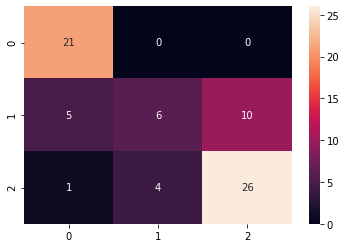

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

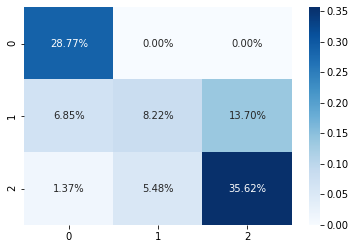

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues',)

<img src="https://www.researchgate.net/profile/B-Aksasse/publication/326866871/figure/fig3/AS:669601385959430@1536656819610/22-confusion-matrix-and-associated-measures.ppm">

In [ ]:
target_names = ['Hiking', 'Running', 'Home']
print(classification_report(actual_array, prediction_array, target_names=target_names))

              precision    recall  f1-score   support

      Hiking       0.78      1.00      0.88        21
     Running       0.60      0.29      0.39        21
        Home       0.72      0.84      0.78        31

    accuracy                           0.73        73
   macro avg       0.70      0.71      0.68        73
weighted avg       0.70      0.73      0.69        73

